# 데이터 분할

- 머신러닝 모델의 성능을 정확하게 평가하기 위해서는 훈련에 사용하지 않은 테스트 세트를 통해 평가해야 함 
- 평가를 위한 별도의 데이터를 준비하거나 준비된 데이터 중에 일부를 떼어 테스트 세트로 준비 
- 훈련 : 테스트 비율은 70 ~ 80 : 20 ~ 30 
    - 반드시 정해져 있는 것은 아니며 연구자 임의로 조절 가능함
    - 전체 데이터가 아주 크고 모든 데이터 패턴을 잘 담아내기만 한다면 테스트 데이터는 1%만 사용해도 충분할 수 있음 

In [18]:
import pandas as pd 
import matplotlib.pyplot as plt 

# 사이킷런 안의 프로세싱 안의 클래스는 트랜스포머 
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 사이킷런 안의 이웃 알고리즘 
from sklearn.neighbors import KNeighborsClassifier

# 사이킷런 데이터 전처리 / train_test_split 데이터 분할 함수 
from sklearn.model_selection import train_test_split

# mglearn  머신러닝 시각화 
import mglearn

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("./data/Fish.csv")
df = df[df["Species"].isin(["Bream", "Smelt"])][["Species", "Weight", "Length2"]]

In [5]:
df.head()

,Species,Weight,Length2
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [7]:
le = LabelEncoder()
df["label"] = le.fit_transform(df["Species"])

In [8]:
df.head()

,Species,Weight,Length2,label
0,Bream,242.0,25.4,0
1,Bream,290.0,26.3,0
2,Bream,340.0,26.5,0
3,Bream,363.0,29.0,0
4,Bream,430.0,29.0,0


In [9]:
df.shape

(49, 4)

## 샘플링 편향

- 훈련 세트에 도미 데이터와 빙어 데이터가 골고루 들어가 있지 않다면 올바르게 분류 할 수 없음 
    - 예) 빙어 없이 모델 훈련이 이루어진다면 어떤 데이터를 빙어로 분류해야할지 알수 없음 
- 데이터가 골고루 섞여있지 않으면 샘플링이 한쪽으로 치우쳤다는 의미로 샘플링 편향(sampling bias)라고 부름 

### train_test_split()

- 전달되는 리스트나 배열을 섞은 후 비율 맞게 훈련 세트와 테스트 세트로 나누어 주는 함수 
- 매개변수
    - 첫 번째 매개변수 : 피처 데이터 세트  = feature 독립변수
    - 두 번째 매개변수 : 레이블 데이터 세트  = 종속변수
    - test_size 
        - 전체 데이터에서 테스트 데이터 세트 크기를 얼마로 샘플링 할 것인가를 결정
        - 초기값은 0.25
        
    - train_size
        - 전체 데이터에서 학습용 데이터 세트 크기를 얼마로 샘플링 할 것인가를 결정
        - 일반적으로는 test_size 를 활용 
        
    - shuffle
        - 데이터를 분리하기 전에 데이터를 미리 섞을지를 결정 
        - 초기값은 True
        - 데이터를 분산시켜서 좀 더 효율적인 학습 및 테스트 데이터 세트를 만드는 데 사용 
    - random_state (씨드값 설정)
        - 매번 코드를 실행할 때마다 다른 결과가 나온다면 정확하게 모델을 평가할 수 없고 모델 최적화에 어려움이 있음
        - 난수를 생성할 때 특정한 규칙으로 생성해서 매번 같은 결과가 나오게 통제할 수 있음 
    - stratify 
        - 무작위로 데이터를 섞으면 샘플링 편향이 일어날 수 있기 때문에 기존 데이터의 비율과 같은 비율로 데이터를 나눌 수 있도록 할 수 있음 
        
- 반환값
    - 튜플 형태
    - 학습 데이터의 피처 데이터 세트, 테스트용 데이터의 피처 데이터 세트, 학습용 데이터의 레이블 데이터 세트, 테스트용 데이터의 레이블 데이터 세트가 순서대로 반환 

In [10]:
# random_state 를 넣었기 때문에 실행을 여러번 해도 값이 같음 - 매번 똑같은 결과를 원하기 때문
# random_state 없으면 랜덤값으로 실행시마다 값 바뀜 
x_train, x_test, y_train, y_test = train_test_split(df[["Length2", "Weight"]], df[["label"]],
                                                    test_size = 0.25,
                                                    stratify = df[["label"]],
                                                    random_state = 7) # random_state 아무거나 넣어도 ok

In [11]:
# x_train 데이터 값 36 , x_ test 데이터 값 13 
# 75: 25 비율로 잘 나누어짐 
print(len(x_train), len(x_test), len(y_train), len(y_test))

36 13 36 13


In [12]:
49 * 0.75

36.75

In [13]:
# 빙어가 4마리 (1이 4개), 도미가 9마리 (0이 9개)
# 비율 대강 맞음 
y_test

,label
28,0
4,0
151,1
33,0
19,0
23,0
25,0
3,0
147,1
14,0


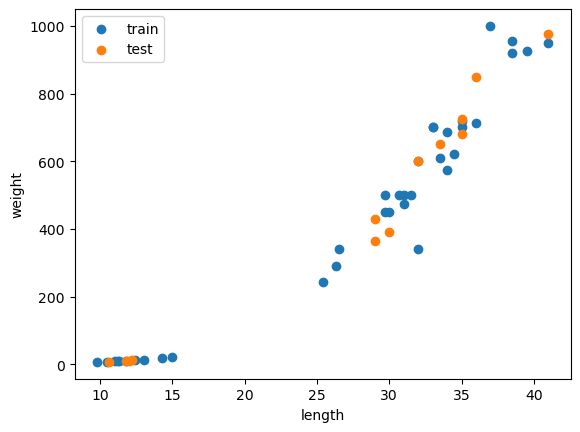

In [14]:
plt.figure()

plt.scatter(x_train["Length2"], x_train["Weight"], label = "train")
plt.scatter(x_test["Length2"], x_test["Weight"], label = "test")

plt.legend()
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

# 모델 훈련 

In [16]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [19]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

# 모델 평가

In [20]:
# 100 퍼센트의 좋은 모델 
knn.score(x_test, y_test)

1.0

In [21]:
x_train

,Length2,Weight
10,31.0,475.0
152,11.8,9.9
5,29.7,450.0
11,31.0,500.0
15,32.0,600.0
17,33.0,700.0
1,26.3,290.0
8,30.0,450.0
0,25.4,242.0
21,34.0,685.0


# 모델 최적화

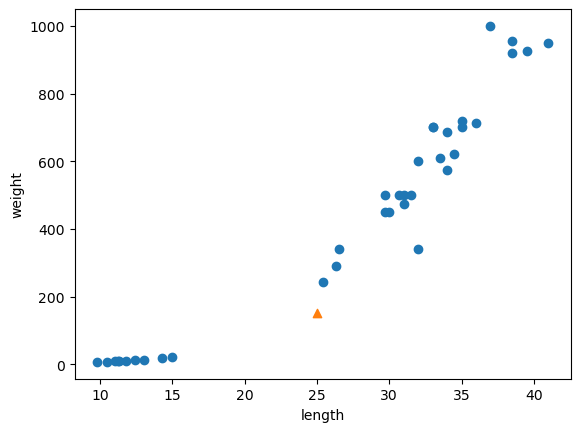

In [23]:
plt.figure()

plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1])
plt.scatter(25, 150, marker = "^")

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [24]:
knn.predict([[25, 150]])

array([1])

- kneighbors()
    - 이웃까지의 거리와 이웃 샘플의 인덱스를 반환

In [25]:
dist, idx = knn.kneighbors([[25, 150]])

In [26]:
dist

array([[ 92.00086956, 130.48375378, 130.73859415, 137.17988191,
        138.32150953]])

In [27]:
# 넘파이 shape([1, 5])
idx

array([[ 8, 19, 31, 24, 10]], dtype=int64)

In [29]:
# 평탄화
# 1차원이 되어야함 그래서 flatten으로 1차원으로 바꿈 
idx.flatten()

array([ 8, 19, 31, 24, 10], dtype=int64)

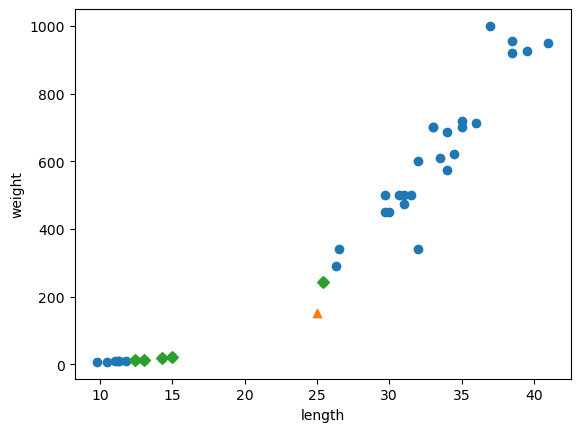

In [28]:
# x축과 y 축 값이 다름 
plt.figure()

plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1])
plt.scatter(25, 150, marker = "^")

# 우리모델이 생각하는 25,150 과 이웃한 데이터들 
plt.scatter(x_train.iloc[idx.flatten(), 0], x_train.iloc[idx.flatten(), 1], marker = "D")

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [30]:
x_train.iloc[idx.flatten()]

,Length2,Weight
0,25.4,242.0
158,15.0,19.9
157,14.3,19.7
155,12.4,13.4
156,13.0,12.2


In [31]:
y_train.iloc[idx.flatten()]

,label
0,0
158,1
157,1
155,1
156,1


- x축은 범위가 좁고 y축은 범위가 넓기 때문에 y축으로 조금만 차이가 벌어져도 큰 값으로 거리가 계산됨 

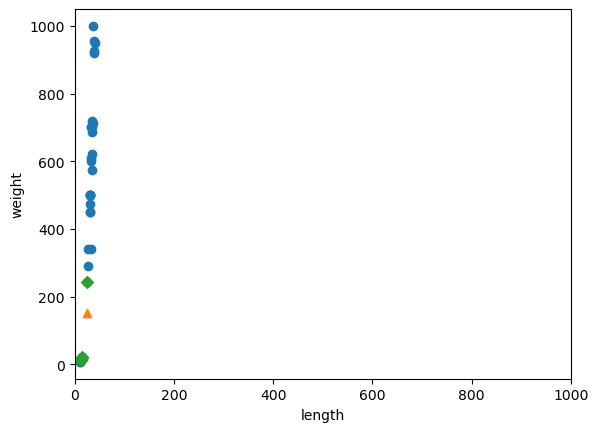

In [32]:
# x축 또한 y 값처럼 0~ 1000까지로 바꿈
# 빙어가 가장 가까움 
plt.figure()

plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1])
plt.scatter(25, 150, marker = "^")

# 우리모델이 생각하는 25,150 과 이웃한 데이터들 
plt.scatter(x_train.iloc[idx.flatten(), 0], x_train.iloc[idx.flatten(), 1], marker = "D")

plt.xlabel("length")
plt.ylabel("weight")
plt.xlim(0, 1000)
plt.show()

- 시각화 자료를 참고하면 현재 데이터에서 생선의 길이는 모델이 값을 예측하는데에 거의 사용되지 않고 있음 
    - 두 독립변수의 단위가 다르기 때문에 
    
- knn은 특히 데이터 간 거리가 모델 성능에 영향을 많이 주는 특성이 있음 
    - 각 독립변수의 단위가 다르면 올바른 예측이 어려울 가능성이 높음
    
- 각 독립변수의 단위를 일정한 기준으로 맞춰주는 작업을 스케일링(scaling)이라고 함 

## 스케일링

- 스탠다드 스케일링(standard scaling)
    - 각 피처 값이 0에서 표준편차의 몇 배만큼 떨어져 있는지를 나타내 데이터의 단위와 관계없이 동일한 조건으로 비교할 수 있게 변환 
        - 분산 : 데이터에서 평균을 뺀 값을 모두 제곱한 다음 평균을 계산 
        - 표준편차 : 분산의 제곱근. 데이터가 분산된 정도 
    - 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환 
        - 몇몇 알고리즘에서는 데이터가 가우시안 정규 분포를 가지고 있다고 가정하고 구현하기 때문에 스탠다드 스케일링이 예측 성능 향상에 중요한 요소가 될 수 있음
            - 서포트 벡터 머신, 선형 회귀, 로지스틱 회귀 
            
    - 계산식
        - (특성값 - 평균) / 표준편차 
        
- MinMaxscaler
    - 데이터 값을 0과 1 사이의 범위값으로 변환
        - 음수 값이 있으면 -1에서 1 사이의 값으로 변환 
        
- 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점
    - scaler 객체를 이용해 데이터 스케일링 변환 시 메서드
        - fit()
            - 데이터 변환을 위한 기준 정보 설정
            - 예) 데이터 세트의 최댓값/최솟값 설정 등 
        
        - transform()
            - fit() 으로 설정된 정보를 이용해 데이터를 변환
            
        - fit_transform() 
            - fit() 과 - transform()을 한번에 적용 
            
    - **학습 데이터로 fit()이 적용된 스케일링 기준정보를 그대로 테스트 데이터에 적용해야함**
        - 테스트 데이터로 다시 새로운 스케일링 기준 정보를 만들게 되면 학습 데이터와 테스트 데이터의 스케일링 기준 정보가 서로 달라지기 때문에 올바른 예측 결과를 도출하지 못함 

In [33]:
ss = StandardScaler()

In [34]:
scaled_x_train = ss.fit_transform(x_train)

In [35]:
# length왼, weight 오
scaled_x_train

array([[ 0.38158347,  0.08784528],
       [-1.537998  , -1.35204327],
       [ 0.25161181,  0.01044856],
       [ 0.38158347,  0.16524199],
       [ 0.48156167,  0.47482887],
       [ 0.58153987,  0.78441574],
       [-0.08831408, -0.48489044],
       [ 0.28160527,  0.01044856],
       [-0.17829446, -0.63349214],
       [ 0.68151807,  0.73797771],
       [-1.41802416, -1.34492277],
       [-1.59798492, -1.35235286],
       [ 0.43157257,  0.16524199],
       [ 0.98145268,  1.71317636],
       [ 0.73150717,  0.53674624],
       [ 0.58153987,  0.78441574],
       [ 1.38136549,  1.55838292],
       [ 0.25161181,  0.16524199],
       [ 0.63152897,  0.50578755],
       [-1.21806776, -1.32108459],
       [ 0.48156167, -0.330097  ],
       [ 0.78149628,  0.78441574],
       [ 1.13141998,  1.46550686],
       [-1.61798056, -1.35266245],
       [-1.47801108, -1.34120773],
       [-0.06831844, -0.330097  ],
       [ 0.35159001,  0.16524199],
       [ 1.23139818,  1.48098621],
       [ 1.13141998,

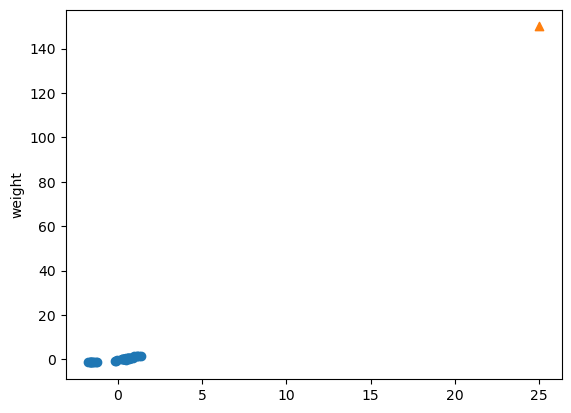

In [36]:
# 스케일링된 데이터 시각화
plt.figure()

plt.scatter(scaled_x_train[:, 0], scaled_x_train[:, 1])

# 150 고질라 출현 # 정상적으로 예측이 안됨 
plt.scatter(25, 150, marker = "^")

plt.ylabel("length")
plt.ylabel("weight")
plt.show()

- 값의 스케일이 달라졌기 때문에 테스트 데이터도 스케일링 해줘야 함 

In [37]:
scaled_data = ss.transform([[25, 150]])
scaled_data

array([[-0.21828574, -0.91831206]])

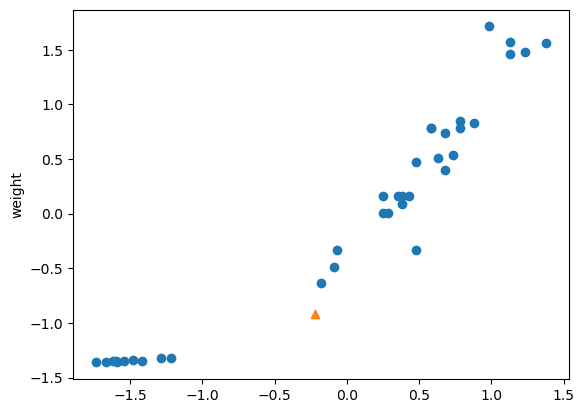

In [38]:
# 스케일링된 데이터 시각화
plt.figure()

plt.scatter(scaled_x_train[:, 0], scaled_x_train[:, 1])


plt.scatter(scaled_data[0, 0], scaled_data[0, 1], marker = "^")

plt.ylabel("length")
plt.ylabel("weight")
plt.show()

In [43]:
# 테스트 데이터 스케일링
scaled_x_test = ss.transform(x_test)

In [44]:
# 스케일링된 데이터로 다시 모델 훈련
knn = KNeighborsClassifier(n_neighbors = 5)

In [45]:
knn.fit(scaled_x_train, y_train)

KNeighborsClassifier()

In [46]:
# 모델 평가 
knn.score(scaled_x_test, y_test)

1.0

In [47]:
# 문제의 데이터 예측 
knn.predict(scaled_data)

array([0])

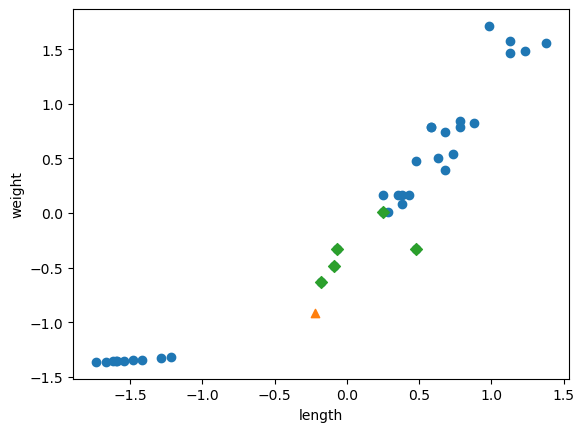

In [48]:
# 시각화
dist, idx = knn.kneighbors(scaled_data)

plt.figure()

plt.scatter(scaled_x_train[:, 0], scaled_x_train[:, 1])
plt.scatter(scaled_data[0, 0], scaled_data[0, 1], marker = "^")
plt.scatter(scaled_x_train[idx.flatten(), 0], scaled_x_train[idx.flatten(), 1], marker = "D")

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [51]:
scaled_x_train[:, 0]

array([ 0.38158347, -1.537998  ,  0.25161181,  0.38158347,  0.48156167,
        0.58153987, -0.08831408,  0.28160527, -0.17829446,  0.68151807,
       -1.41802416, -1.59798492,  0.43157257,  0.98145268,  0.73150717,
        0.58153987,  1.38136549,  0.25161181,  0.63152897, -1.21806776,
        0.48156167,  0.78149628,  1.13141998, -1.61798056, -1.47801108,
       -0.06831844,  0.35159001,  1.23139818,  1.13141998,  0.78149628,
        0.88147448, -1.2880525 , -1.66796966, -1.5879871 , -1.7379544 ,
        0.68151807])

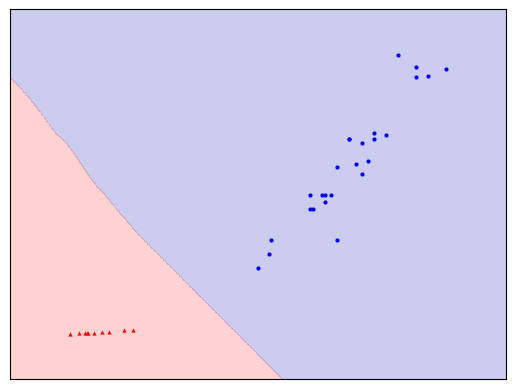

In [52]:
# 결정경계 시각화
# 빨간색이 빙어로 예측된다 
plt.figure()

mglearn.plots.plot_2d_separator(knn, scaled_x_train, fill = True, eps = 0.5, alpha = 0.2)
mglearn.discrete_scatter(scaled_x_train[:, 0].reshape(-1, 1), 
                         scaled_x_train[:, 1].reshape(-1, 1), 
                         y_train,
                         markeredgewidth = 0.1, c = ["b", "r"], s = 3)
plt.show()